# Univariate Resemblance Analysis (URA) Dataset D

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from univariate_resemblance import basic_stats
from univariate_resemblance import student_t_tests
from univariate_resemblance import mann_whitney_tests
from univariate_resemblance import ks_tests
from univariate_resemblance import chi_squared_tests
from univariate_resemblance import scale_data
from univariate_resemblance import euclidean_distances
from univariate_resemblance import cosine_distances
from univariate_resemblance import js_distances
from univariate_resemblance import wass_distances

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/D_ContraceptiveMethod_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/D_ContraceptiveMethod_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/D_ContraceptiveMethod_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/D_ContraceptiveMethod_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/D_ContraceptiveMethod_Synthetic_WGANGP.csv'}
categorical_columns = ['wife_education','husband_education','wife_religion','wife_working','husband_occupation',
                        'standard_of_living_index','media_exposure','contraceptive_method_used']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':       wife_age wife_education husband_education  children wife_religion  \
 0           36              2                 4        11             1   
 1           48              1                 3         4             1   
 2           38              1                 2         8             1   
 3           27              2                 2         5             1   
 4           26              3                 2         4             1   
 ...        ...            ...               ...       ...           ...   
 1173        34              2                 4         6             1   
 1174        23              4                 4         1             1   
 1175        29              3                 4         3             1   
 1176        37              4                 4         5             0   
 1177        31              4                 4         2             1   
 
      wife_working husband_occupation standard_of_living_index media_exposure 

## 2. Basic statistics comparisson
In this part the basic statistics of each attribute for each dataset are computed.
- means and stds of all variables are compared.

In [5]:
df_means_std = pd.DataFrame(index=data['Real'].select_dtypes(include=['float64','int64']).columns.tolist())
for name in DATA_TYPES :
    means_stds = basic_stats(data[name])
    means_stds.columns = [name]
    df_means_std = pd.concat([df_means_std,means_stds], axis=1)
df_means_std

,Real,GM,SDV,CTGAN,WGANGP
wife_age,32.83 ± 8.33,31.91 ± 8.54,32.73 ± 8.48,27.24 ± 10.6,29.14 ± 3.33
children,3.35 ± 2.43,2.85 ± 2.49,3.33 ± 2.48,2.34 ± 2.49,1.92 ± 1.1


## 3. Statistical Tests
In this part some statistical tests are performed to compare variables from real and synthetic data.

### 3.1. Sudent t-test
- null hypothesis (p > 0.05): Means of real and synthetic feature are the same.
- alternative hypothesis (p < 0.05): Mean of real and synthetic feature are significantly different.

In [6]:
p_values_student = dict()
for name in SYNTHESIZERS :
    p_values_student[name] = student_t_tests(data['Real'], data[name])
df_student_test = pd.DataFrame(data=p_values_student, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_student_test.to_csv('UNIVARIATE RESEMBLANCE RESULTS/student_t_tests.csv')
df_student_test

,GM,SDV,CTGAN,WGANGP
wife_age,8.5340e-03,0.7800,4.2264e-44,1.8090e-43
children,8.4974e-07,0.8864,8.1892e-23,6.7412e-71


### 3.2. Mann-Whitney U-Test
- null hypothesis (p > 0.05): Real feature and synthetic feature come from the same population.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature does not come from the same population.

In [7]:
p_values_mann_whitnney = dict()
for name in SYNTHESIZERS :
    p_values_mann_whitnney[name] = mann_whitney_tests(data['Real'], data[name])
df_mann_whitney = pd.DataFrame(data=p_values_mann_whitnney, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_mann_whitney.to_csv('UNIVARIATE RESEMBLANCE RESULTS/mann_whitnney_tests.csv')
df_mann_whitney

,GM,SDV,CTGAN,WGANGP
wife_age,4.8600e-03,0.3818,1.1151e-45,4.6582e-24
children,7.6782e-10,0.0158,1.1965e-33,7.3570e-54


### 3.3. Kolmogorov-Smirnov Test
- null hypothesis (p > 0.05): Real feature and synthetic feature distributions are equal.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature distributions are not equal.

In [8]:
p_values_ks = dict()
for name in SYNTHESIZERS :
    p_values_ks[name] = ks_tests(data['Real'], data[name])
df_ks = pd.DataFrame(data=p_values_ks, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_ks.to_csv('UNIVARIATE RESEMBLANCE RESULTS/ks_tests.csv')
df_ks

,GM,SDV,CTGAN,WGANGP
wife_age,4.4246e-02,0.0277,2.2217e-43,3.4630e-73
children,1.1493e-06,0.0002,5.8120e-25,1.2896e-50


### 3.4. Join all p-values of all tests in one unique dataset

In [9]:
tests_all_data = np.round(np.concatenate([df_student_test.values, df_mann_whitney.values, df_ks.values] , axis=1),4)
#join results of all tests
df_tests_all = pd.DataFrame(data=tests_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_S','SDV_S','CTGAN_S','WGANGP_S','GM_M','SDV_M','CTGAN_M','WGANGP_M','GM_K','SDV_K','CTGAN_K','WGANGP_K'])
df_tests_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/STATISTICAL_TESTS_ALL.csv')
df_tests_all

,GM_S,SDV_S,CTGAN_S,WGANGP_S,GM_M,SDV_M,CTGAN_M,WGANGP_M,GM_K,SDV_K,CTGAN_K,WGANGP_K
wife_age,0.0085,0.7800,0.0,0.0,0.0049,0.3818,0.0,0.0,0.0442,0.0277,0.0,0.0
children,0.0000,0.8864,0.0,0.0,0.0000,0.0158,0.0,0.0,0.0000,0.0002,0.0,0.0


### 3.4. Chi-Squared Test (categorical variables)
- null hypothesis (p > 0.05): There is not statistical relationship between real and synthetic feature.
- alternative hypothesis (p < 0.05): There is a statistical relationship between real and synthetic feature.

In [10]:
p_values_chi = dict()
for name in SYNTHESIZERS :
    p_values_chi[name] = chi_squared_tests(data['Real'], data[name])
df_chi = pd.DataFrame(data=p_values_chi, index=(data['Real'].select_dtypes(include=['category'])).columns)
df_chi.to_csv('UNIVARIATE RESEMBLANCE RESULTS/chi_squared_tests.csv')
df_chi

,GM,SDV,CTGAN,WGANGP
wife_education,0.4200,0.2212,0.9338,0.1482
husband_education,0.6556,0.6165,0.6220,0.3260
wife_religion,0.2305,0.3193,0.2409,1.0000
wife_working,0.8195,0.5735,0.2900,0.8019
husband_occupation,0.7844,0.8524,0.8500,0.3265
standard_of_living_index,0.7134,0.4023,0.0116,0.1976
media_exposure,0.8713,0.5782,0.0462,1.0000
contraceptive_method_used,0.2463,0.6431,0.7546,0.4237


## 4. Distances calculation for each numerical variable
In this part some distance metrics are calculated for each numerical variable. First the data is scaled between 0 and 1.

In [11]:
#Scale the data
num_cols = (data['Real'].select_dtypes(include=['int64','float64'])).columns
scaled_data = dict()
for name in DATA_TYPES :
    scaled_data[name] = scale_data(data[name][num_cols])
scaled_data

{'Real':       wife_age  children
 0       0.6061    0.6875
 1       0.9697    0.2500
 2       0.6667    0.5000
 3       0.3333    0.3125
 4       0.3030    0.2500
 ...        ...       ...
 1173    0.5455    0.3750
 1174    0.2121    0.0625
 1175    0.3939    0.1875
 1176    0.6364    0.3125
 1177    0.4545    0.1250
 
 [1178 rows x 2 columns],
 'GM':       wife_age  children
 0       0.8205    0.1176
 1       0.0000    0.0588
 2       0.2308    0.1176
 3       0.5128    0.1765
 4       0.4359    0.1176
 ...        ...       ...
 1173    0.7692    0.1765
 1174    0.1026    0.1176
 1175    0.5897    0.4706
 1176    0.3590    0.1765
 1177    0.4359    0.0588
 
 [1178 rows x 2 columns],
 'SDV':       wife_age  children
 0       0.3818    0.5294
 1       0.6182    0.7647
 2       0.3091    0.4118
 3       0.4545    0.5882
 4       0.2909    0.5294
 ...        ...       ...
 1173    0.4364    0.5294
 1174    0.3818    0.4706
 1175    0.4364    0.5882
 1176    0.6545    0.4706
 1177    0.47

### 4.1. Euclidean distances
Square root of the sum of squares of differences between real feature and synthetic feature

In [12]:
euclidean_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    euclidean_dists[name] = euclidean_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_euclidean_dists = pd.DataFrame(data=euclidean_dists, index=num_cols)
df_euclidean_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/euclidean_distances.csv')
df_euclidean_dists

,GM,SDV,CTGAN,WGANGP
wife_age,11.6802,10.6778,12.7123,11.2982
children,7.3494,13.6304,7.3174,9.0209


### 4.2. Cosine distances
Related with cosine similarity; the dot product of the two vectors divided by the product of the two vectors' lengths.

In [13]:
cosine_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    cosine_dists[name] = cosine_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_cosine_dists = pd.DataFrame(data=cosine_dists, index=num_cols)
df_cosine_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/cosine_distances.csv')
df_cosine_dists

,GM,SDV,CTGAN,WGANGP
wife_age,0.1890,0.1602,0.2402,0.1752
children,0.3286,0.2108,0.3579,0.2993


### 4.3. Jensen-Shannon distances
Measures the similarity between two probability distributions.

In [14]:
js_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    js_dists[name] = js_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_js_dists = pd.DataFrame(data=js_dists, index=num_cols)
df_js_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/js_distances.csv')
df_js_dists

,GM,SDV,CTGAN,WGANGP
wife_age,0.0624,0.0528,0.0603,0.0524
children,0.0235,0.0319,0.0249,0.0294


### 4.4. Wasserstein distances
Minimum amount of work required to transform a vector into another vector.

In [15]:
was_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    was_dists[name] = wass_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_was_dists = pd.DataFrame(data=was_dists, index=num_cols)
df_was_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/wass_distances.csv')
df_was_dists

,GM,SDV,CTGAN,WGANGP
wife_age,0.0352,0.1071,0.1268,0.1403
children,0.0292,0.3398,0.0328,0.1102


### 4.5. Join all distances in an unique dataframe

In [16]:
distances_all_data = np.round(np.concatenate([df_cosine_dists.values, df_js_dists.values, df_was_dists.values] , axis=1),4)
#join results of all tests
df_dists_all = pd.DataFrame(data=distances_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_C','SDV_C','CTGAN_C','WGANGP_C','GM_J','SDV_J','CTGAN_J','WGANGP_J','GM_W','SDV_W','CTGAN_W','WGANGP_W'])
df_dists_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/DISTANCES_ALL.csv')
df_dists_all

,GM_C,SDV_C,CTGAN_C,WGANGP_C,GM_J,SDV_J,CTGAN_J,WGANGP_J,GM_W,SDV_W,CTGAN_W,WGANGP_W
wife_age,0.1890,0.1602,0.2402,0.1752,0.0624,0.0528,0.0603,0.0524,0.0352,0.1071,0.1268,0.1403
children,0.3286,0.2108,0.3579,0.2993,0.0235,0.0319,0.0249,0.0294,0.0292,0.3398,0.0328,0.1102


## 5. Boxplots comparisson
In this part boxplots of each variable are plotted to analyse the statistical properties of each variable.

In [17]:
columns = (data['Real'].select_dtypes(include=['float64','int64'])).columns
len(columns)

2

In [18]:
boxplots_data = dict()
for c in columns :
    boxplots_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        boxplots_data[c] = np.column_stack((boxplots_data[c], data[name][c]))

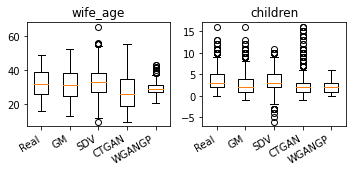

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5,2.5))

for i in range(0,len(columns)) :
    ax = axs[i]
    ax.boxplot(boxplots_data[columns[i]])
    ax.set_title(columns[i])
    ax.set_xticklabels(DATA_TYPES)

for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")
fig.tight_layout()
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/BOXPLOTS.svg', bbox_inches='tight')

## 6. Frequency distributions comparisson
In this part histograms of each variable are plotted to compare the frequency distributions.

In [20]:
columns = data['Real'].columns
columns

Index(['wife_age', 'wife_education', 'husband_education', 'children',
       'wife_religion', 'wife_working', 'husband_occupation',
       'standard_of_living_index', 'media_exposure',
       'contraceptive_method_used'],
      dtype='object')

In [21]:
hists_data = dict()
for c in columns :
    hists_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        hists_data[c] = np.column_stack((hists_data[c], data[name][c]))

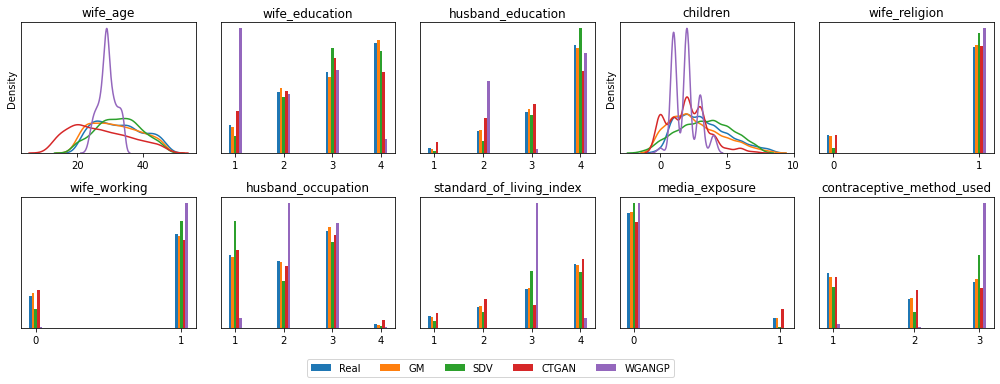

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(14,5))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[0,3], 4:[0,4], 5:[1,0], 6:[1,1], 7:[1,2], 8:[1,3], 9:[1,4]}

for i in range(0,len(columns)) :
    ax = axs[idx[i][0], idx[i][1]]
    ax.set_title(columns[i])
        
    if i in [0,3] :
        arr = hists_data[columns[i]]
        for col in range(arr.shape[1]) :
            arr_col = np.sort(arr[:,col])
            sns.distplot(arr_col[int(0.05*len(arr_col)) : int(0.95 * len(arr_col))], hist=False, norm_hist=False, ax=ax)
    else :
        ax.hist(hists_data[columns[i]], density=False, histtype='bar', label=DATA_TYPES, align='mid')
        
        if columns[i] in ['wife_education','husband_education','husband_occupation','standard_of_living_index'] :
            ax.set_xticks([1.15, 2.05, 2.95, 3.85])
            ax.set_xticklabels([1,2,3,4])
            
        elif columns[i] in ['wife_religion','wife_working','media_exposure'] :
            ax.set_xticks([0.05, 0.95])
            ax.set_xticklabels([0,1])
        
        else :
            ax.set_xticks([1.1, 2.1, 2.9])
            ax.set_xticklabels([1,2,3])
            
    ax.set_yticks([])
    
fig.tight_layout()
axs[idx[i][0], idx[i][1]].legend(ncol=5, bbox_to_anchor=(-0.8,-0.2))
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/HISTOGRAMS.svg', bbox_inches='tight')